# Data Loading

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (auc, roc_curve, precision_recall_curve,
                             plot_precision_recall_curve, average_precision_score)
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.inspection import partial_dependence, plot_partial_dependence

warnings.filterwarnings("ignore", category=FutureWarning)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 7),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
#read train data csv and save it as df
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [3]:
#read test data csv and save it as df_test
df_test = pd.read_csv('bank-additional/bank-additional.csv', sep=';')

In [4]:
#examine the first five rows
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [5]:
#examine the shape of the train dataframe 
df.shape

(41188, 21)

In [6]:
#get info for the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There appear to be no null values present in the dataframe, however it needs to be examined if null values are present in another form like Others/Unknown etc.

In [7]:
#get the description of the dataframe
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


At first glance it can be observed that the duration and pdays column have a very high standard deviation.

# Exploratory Data Analysis

In [8]:
#get value counts for the target variable
df['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Here y refers to the clients that subscribed to the term deposit. There is about 1:8 ratio between the clients who subscribed versus who didn't. There is a class imbalance between the two classes, which will have to be accounted for during modeling.

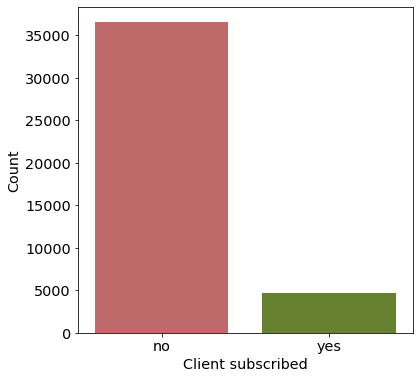

In [9]:
#visualize the target variable
plt.figure(figsize= (6, 6))
sns.countplot(x='y', data=df, palette=['indianred', 'olivedrab'])
plt.xlabel('Client subscribed')
plt.ylabel('Count')
plt.show()

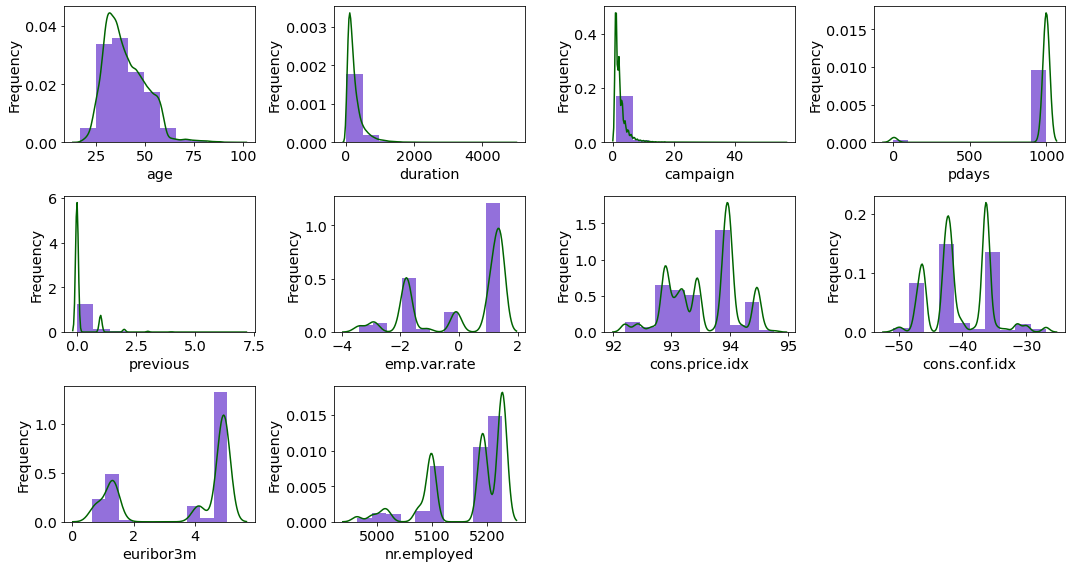

In [10]:
#visualize the histogram alongwith the density for numeric variables
feat_hist = [i for i in df.columns if i in ['age', 'duration', 'campaign',
                                            'pdays','previous', 'emp.var.rate',
                                            'cons.price.idx', 'cons.conf.idx',
                                            'euribor3m', 'nr.employed']]

plt.figure(figsize= (15, 8))
for i, col in enumerate(feat_hist):
    plt.subplot(3, 4, i+1)
    plt.hist(col, data=df, density=True, color='mediumpurple')
    sns.kdeplot(x=col, data=df, color='darkgreen')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are few interesting things to notice here:
- Duration, campaign and previous show a heavily right-skewed distribution
- pdays shows a heavily left-skewed distribution
- The economic indices show  multimodal distribution

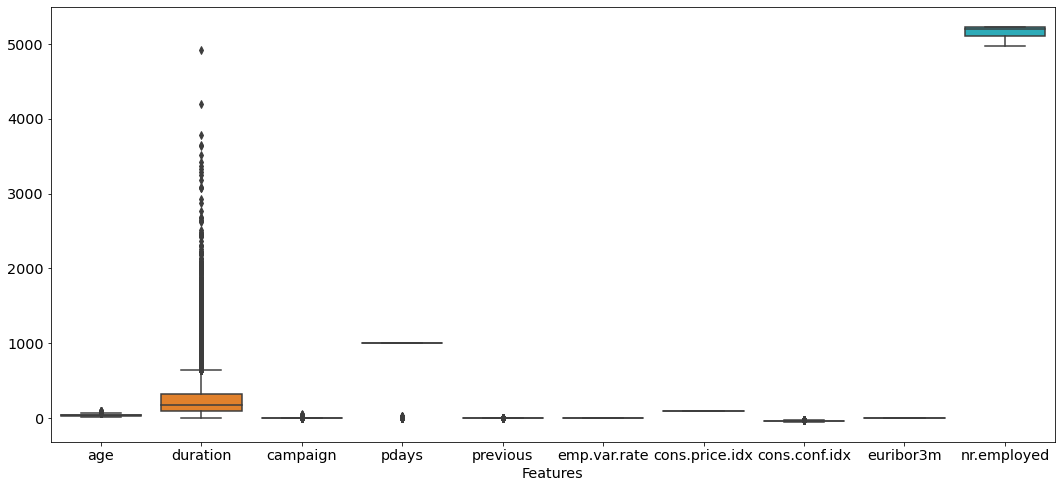

In [11]:
#visualize the boxplots for the numeric features
plt.figure(figsize=(18, 8))
sns.boxplot(data=df[['age', 'duration', 'campaign',
                     'pdays','previous', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']])
plt.xlabel('Features')
plt.show()

As noticed above as well, duration and pdays have a lot of outliers.

In [12]:
df['pdays'].value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
19     0.000073
22     0.000073
21     0.000049
20     0.000024
25     0.000024
26     0.000024
27     0.000024
Name: pdays, dtype: float64

pdays has 96% of the values as 999 meaning client was not previously contacted. This doesn't provide any information about the outcome, hence this feature will be dropped.

In [13]:
#drop pdays from df
df.drop(['pdays'], axis=1, inplace=True)

In [14]:
#get value counts for previous
df['previous'].value_counts(normalize=True)

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

In [15]:
#get value counts for poutcome
df['poutcome'].value_counts(normalize=True)

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

There seems to be a strong relationship between number of contacts performed before this campaign and the outcome. Clients who were not previously contacted have non-existent outcome (86%), clients contacted once have failure as outcome (around 10%) and clients contacted more than once showed success as the outcome (around 3%), implying there should be an emphasis on contacting the clients atleast more than once.

<AxesSubplot:xlabel='poutcome', ylabel='count'>

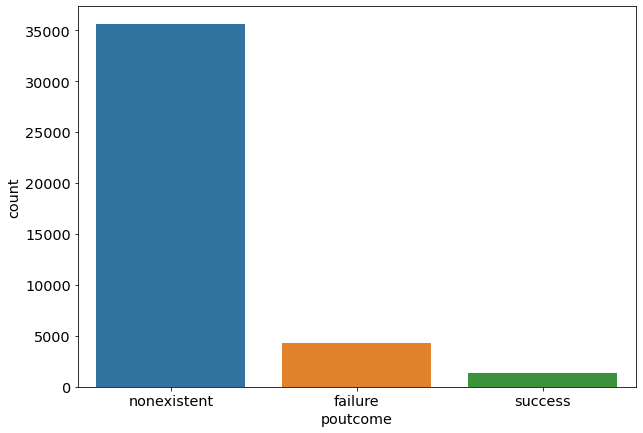

In [16]:
sns.countplot('poutcome', data= df)

<AxesSubplot:xlabel='previous', ylabel='count'>

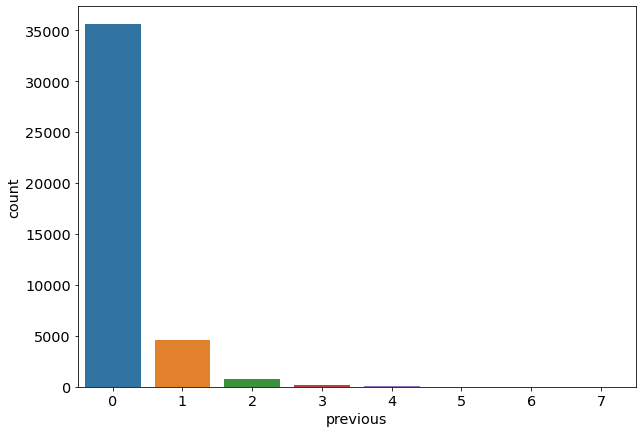

In [17]:
sns.countplot('previous', data= df)

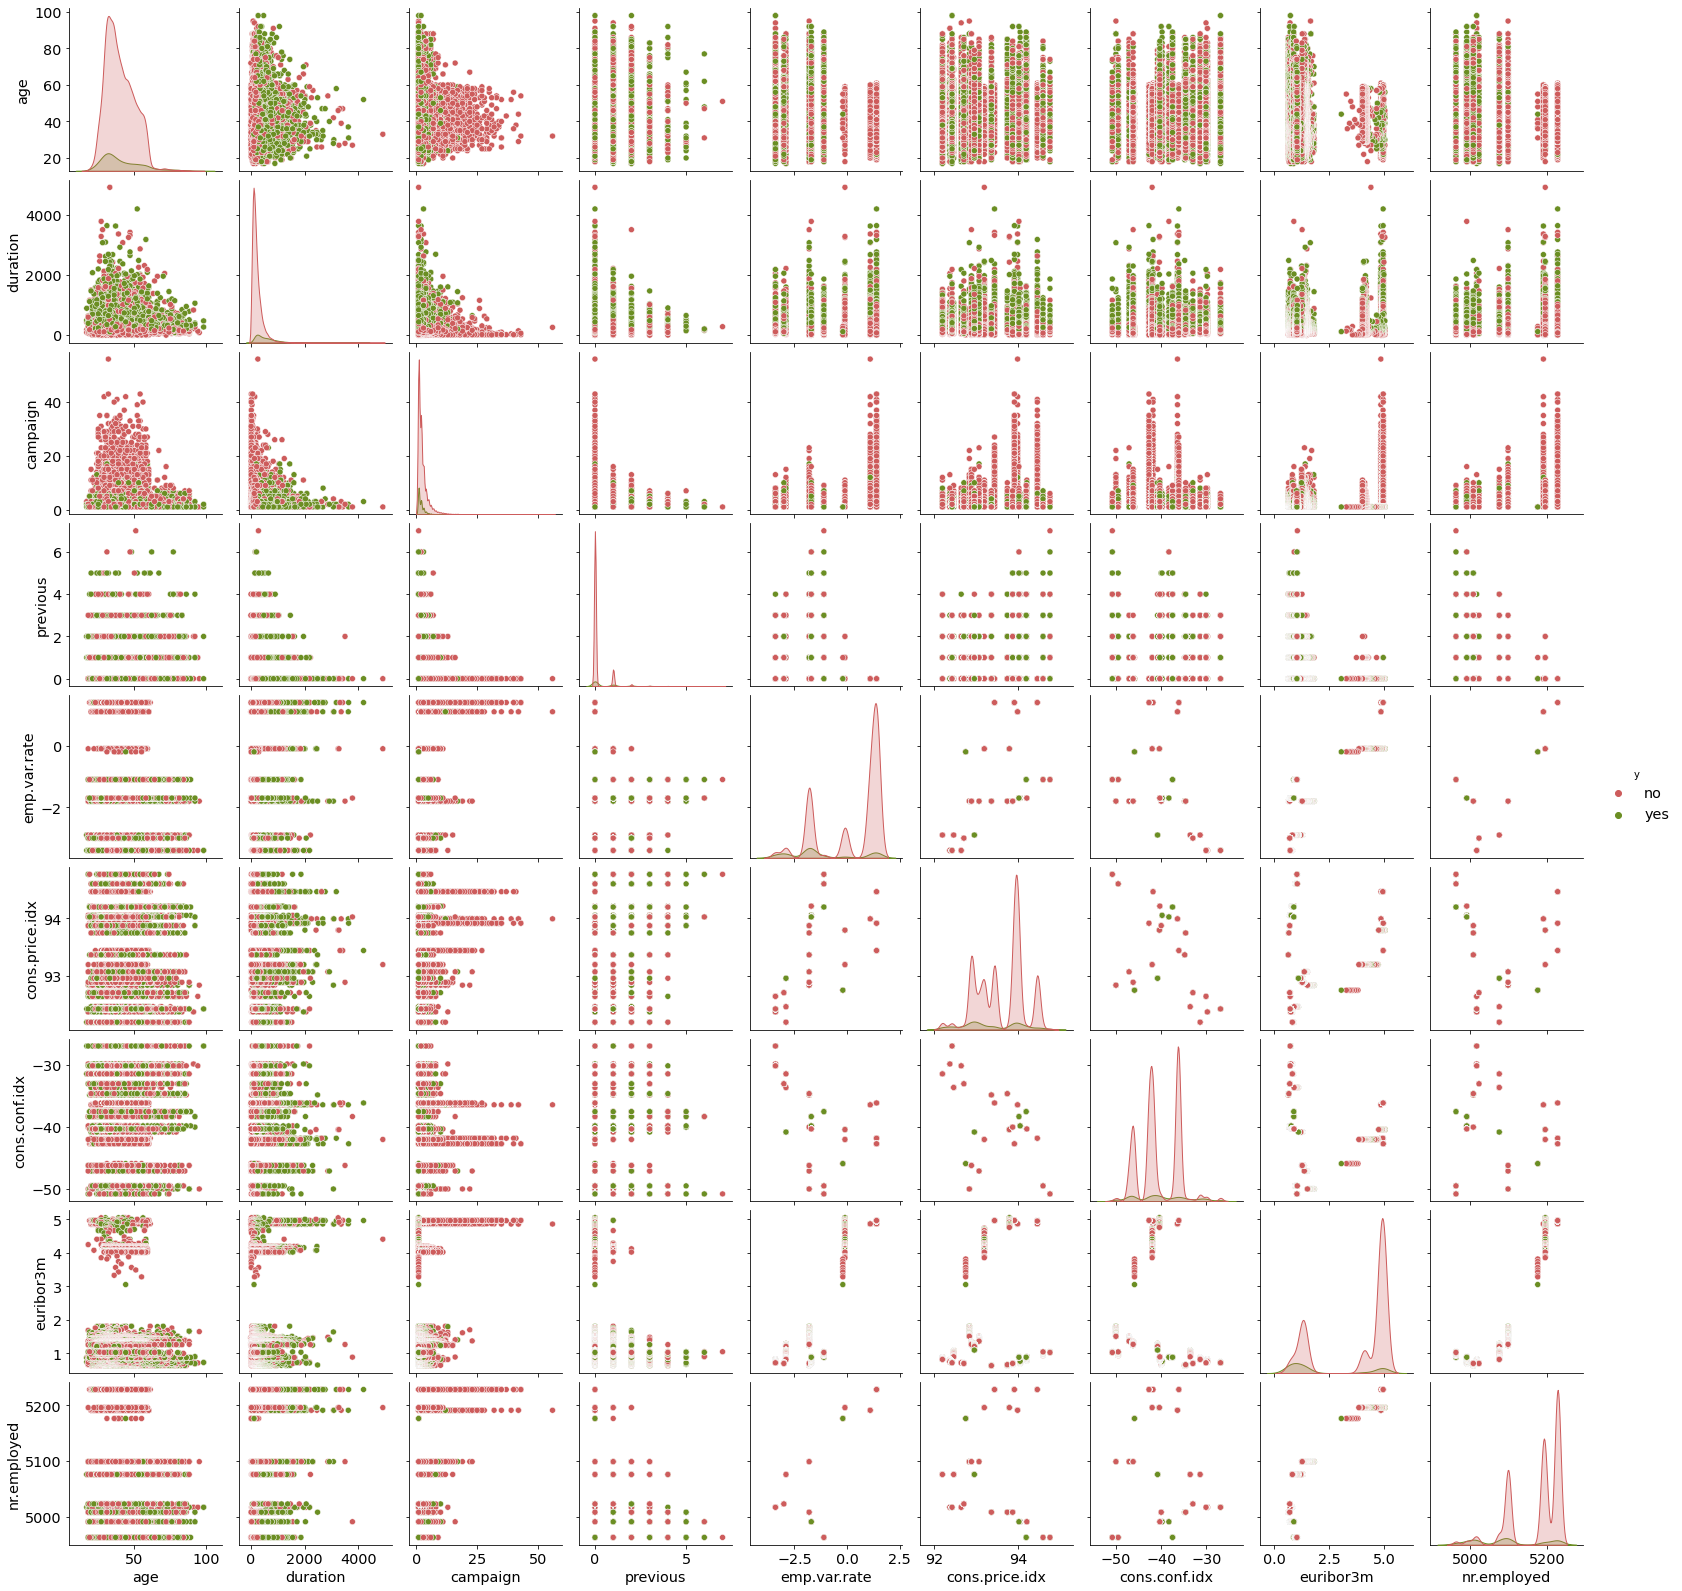

In [18]:
#visualize the pairplot for the numerical features
sns.pairplot(df, hue= 'y', palette=['indianred', 'olivedrab'])
plt.show()

Let's explore some of these features in more detail, namely the economic indices and their relationship between them.

Text(0, 0.5, 'Euribor 3-month Rate')

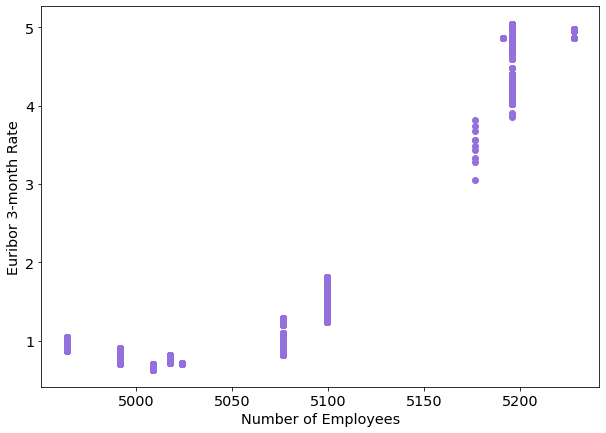

In [19]:
#relationship between number of employees and Euribor 3-month rate
plt.scatter(x='nr.employed', y='euribor3m', data=df, color='mediumpurple')
plt.xlabel('Number of Employees')
plt.ylabel('Euribor 3-month Rate')

Text(0, 0.5, 'Employment Variation Rate')

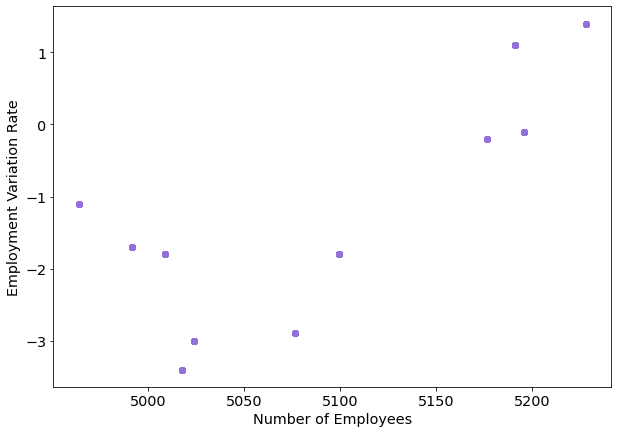

In [20]:
#relationship between number of employees and employment variation rate
plt.scatter(x='nr.employed', y='emp.var.rate', data=df, color='mediumpurple')
plt.xlabel('Number of Employees')
plt.ylabel('Employment Variation Rate')

Text(0, 0.5, 'Employment Variation Rate')

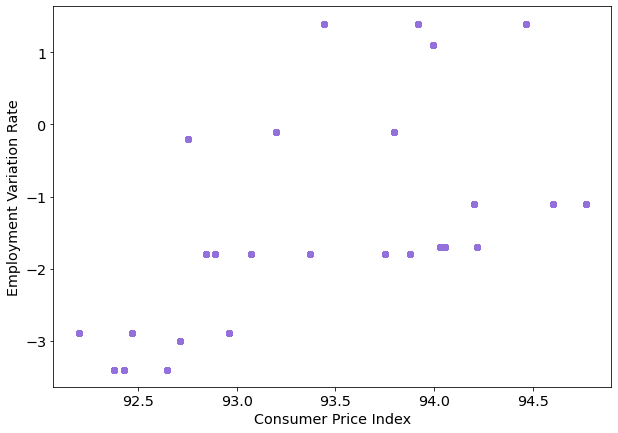

In [21]:
#relationship between consumer price index and employment variation rate
plt.scatter(x='cons.price.idx', y='emp.var.rate', data=df, color='mediumpurple')
plt.xlabel('Consumer Price Index')
plt.ylabel('Employment Variation Rate')

Text(0, 0.5, 'Employment Variation Rate')

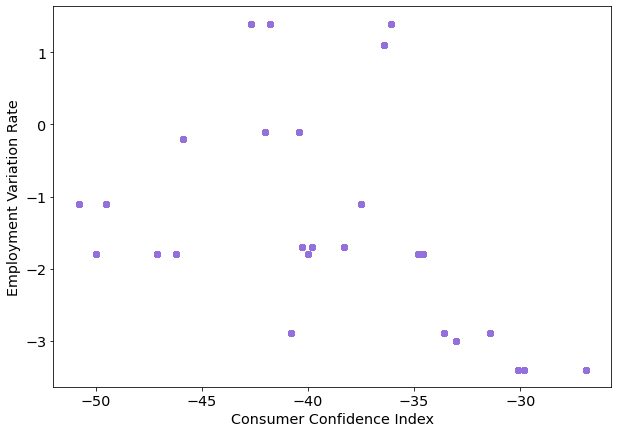

In [22]:
##relationship between number of consumer confidence index and employment variation rate
plt.scatter(x='cons.conf.idx', y='emp.var.rate', data=df, color='mediumpurple')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Employment Variation Rate')

From the above plots, it can be deduced the country has been going through or coming out of some sort of instability (recession/pandemic?). 

In [23]:
#group by target and get means for continuous variables
df_grouped = df.groupby('y')[['age', 'campaign', 'previous', 'emp.var.rate',
                              'duration', 'cons.price.idx', 'cons.conf.idx',
                              'euribor3m', 'nr.employed']].mean().reset_index()
df_grouped

,y,age,campaign,previous,emp.var.rate,duration,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,no,39.911185,2.633085,0.132374,0.248875,220.844807,93.603757,-40.593097,3.811491,5176.166600
1,yes,40.913147,2.051724,0.492672,-1.233448,553.191164,93.354386,-39.789784,2.123135,5095.115991


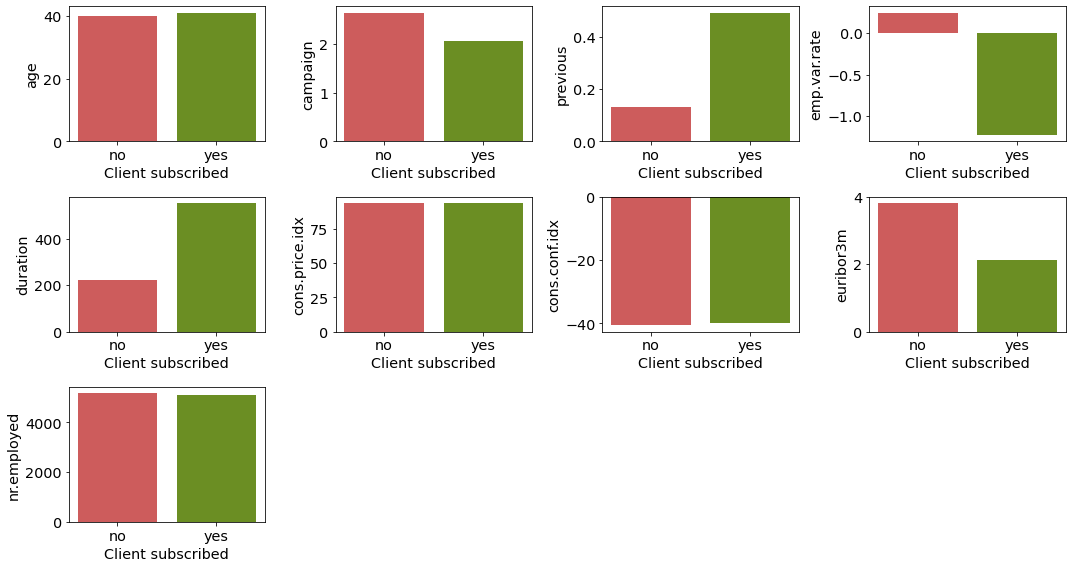

In [24]:
#plot barplots for the mean of grouped features
feat_bar = [i for i in df_grouped.columns if i not in ['y']]

plt.figure(figsize= (15, 8))
for i, col in enumerate(feat_bar):
    plt.subplot(3, 4, i+1)
    plt.bar(x='y', height=col, data=df_grouped, color=['indianred', 'olivedrab'])
    plt.xlabel('Client subscribed')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

As can be observed, fewer campaigns, low employee variation rate and low euribor3m are associated with lower client subsriptions. Higher number of contacts performed before this campaign and duration are associated with higher client subscriptions.

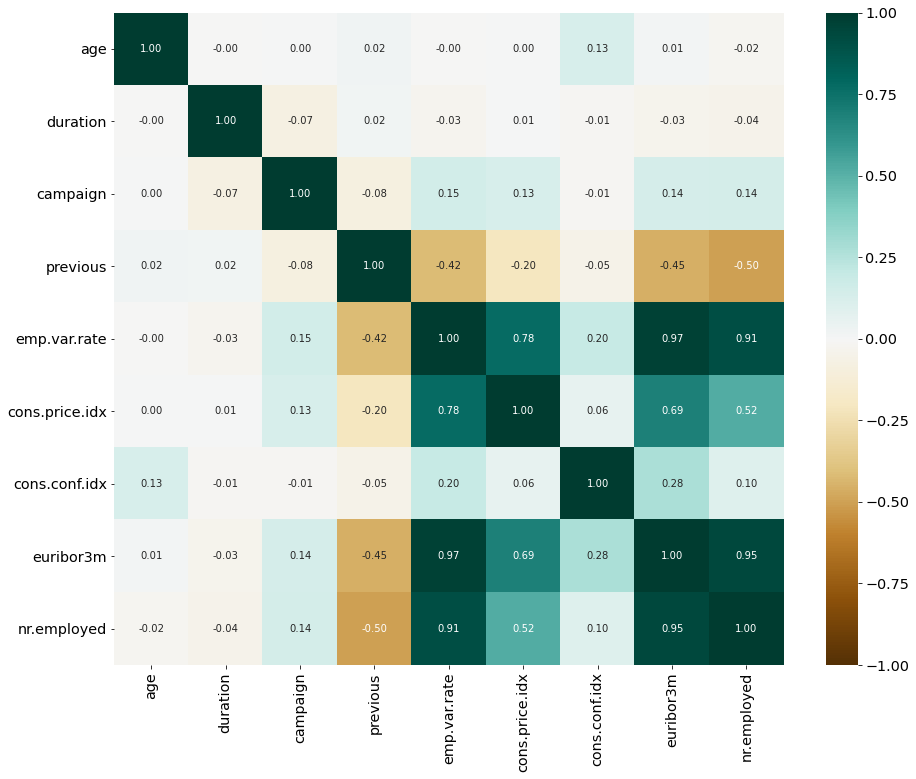

In [25]:
#adding heatmaps
plt.figure(figsize= (15, 12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', annot=True, fmt= '.2f')
plt.show()

There is a high correlation between euribor3m and number of employees, employee variation rate and euribor3m, employee variation rate and number of employees. There is a moderately positive correlation between employee variation rate and consumer price index, euribor3m and consumer price index.

In [26]:
#get value counts for job
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [27]:
#get value counts for marital
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [28]:
#get value counts for default
df['default'].value_counts(normalize=True)

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

In [29]:
#99% of default values are no or unknown, and therefore we can drop the feature
df.drop(['default'], axis=1, inplace=True)

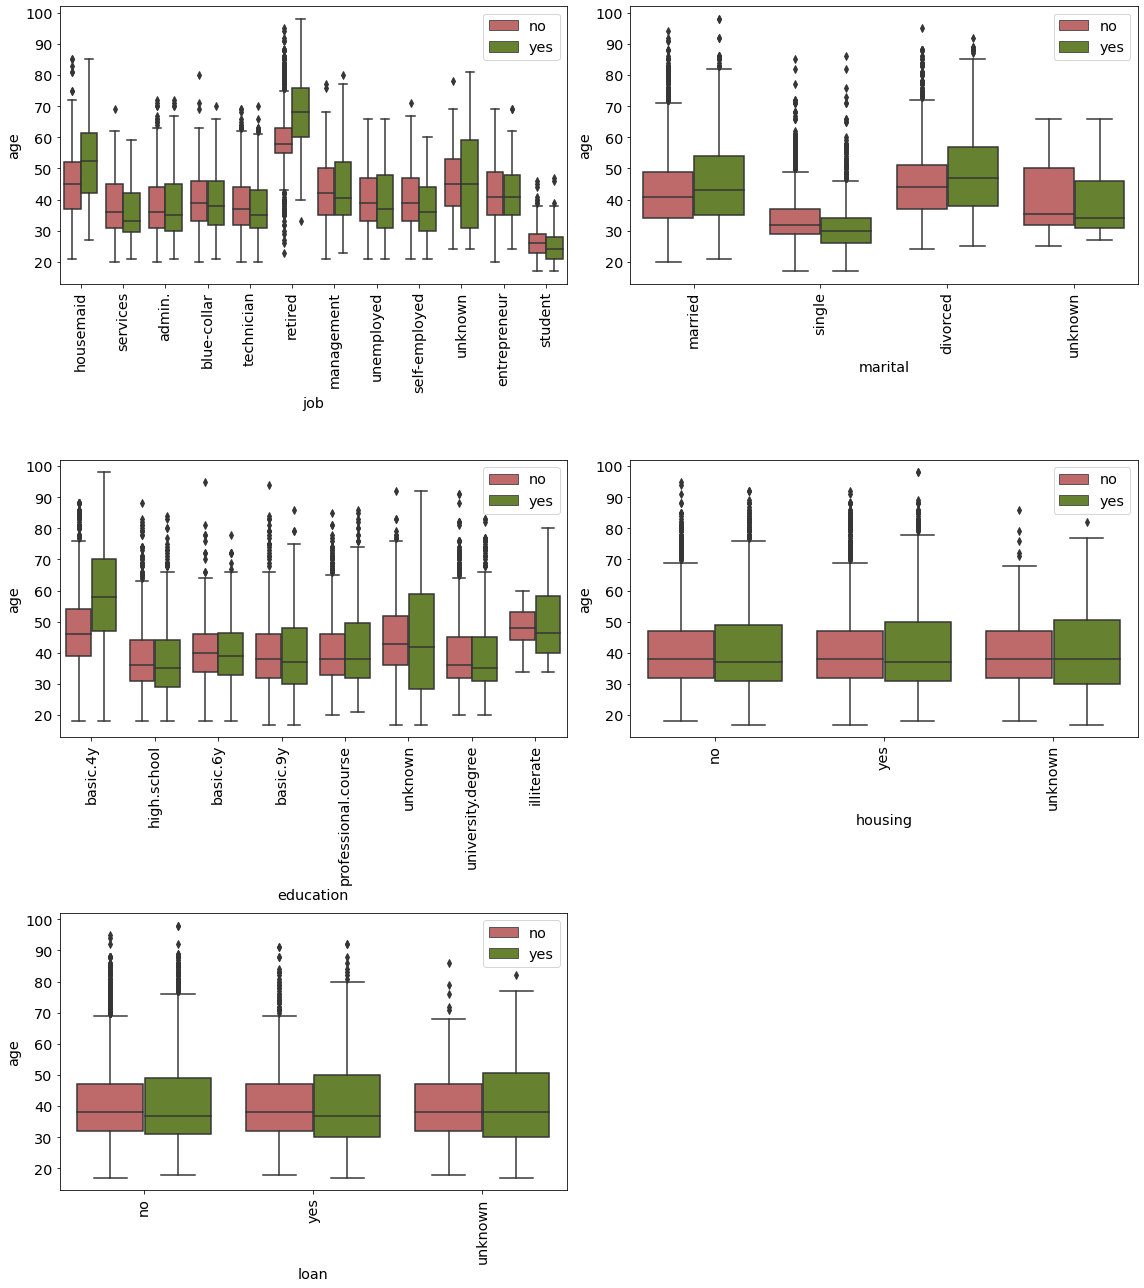

In [30]:
#visualize boxplots for the categorical features with hue as target variable
feat_bp = [col for col in df.columns if col in ['job', 'marital', 'education',
                                                'housing', 'loan']]



plt.figure(figsize= (16, 18))
for i, col in enumerate(feat_bp):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=col, y='age', hue='y', data=df, palette=['indianred', 'olivedrab'])
    plt.xticks(rotation=90)
    plt.legend(loc= 'best')
plt.tight_layout()
plt.show()

The median age for clients who subscribed for term deposit is higher for retired folks and housemaids and lower for the students. Married and divorced people tend to subscribe later for term deposit as compared to singles. People with basic 4 year education subscribe for term deposit at a later age.

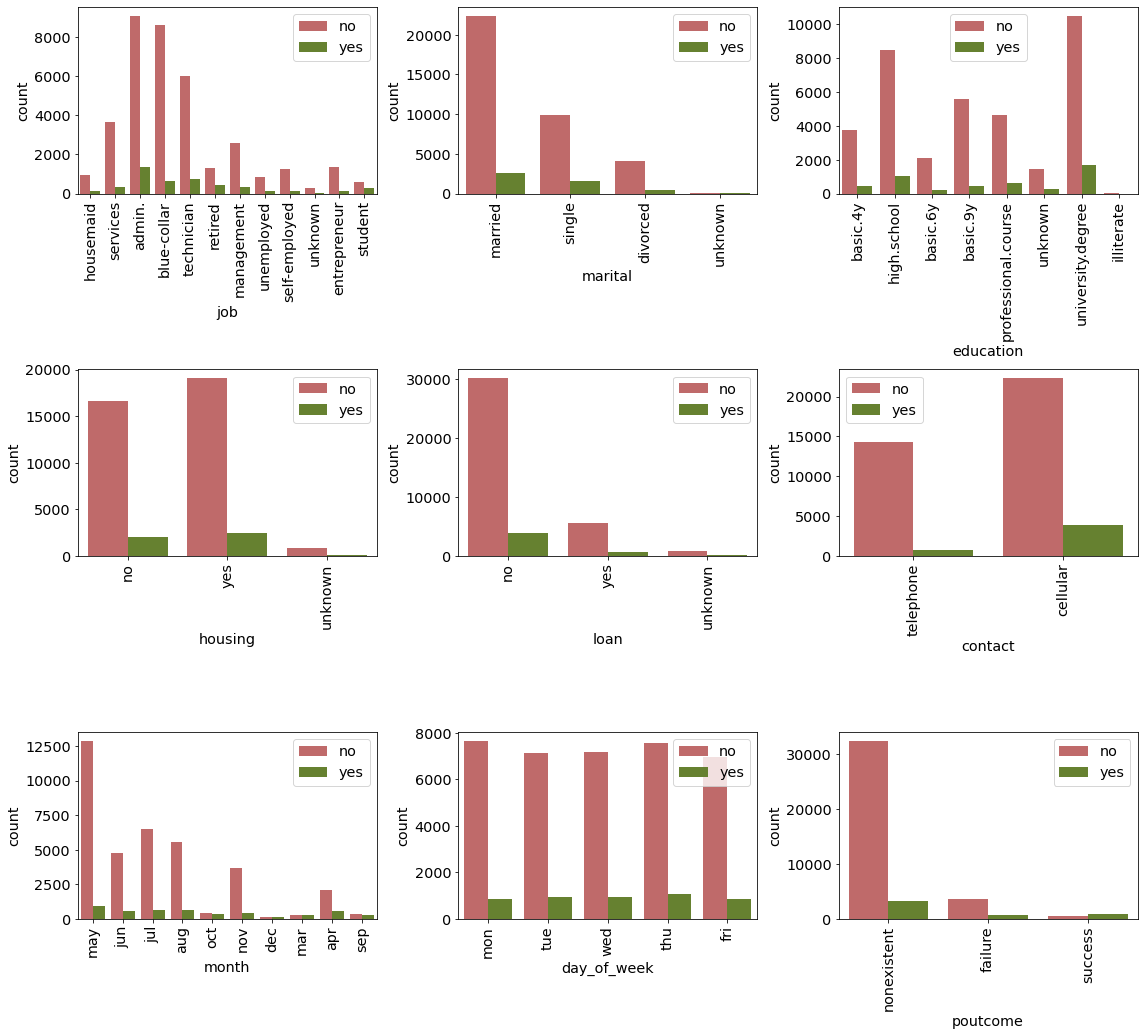

In [31]:
#visualize barplots for the categorical features with hue as target variable
feat_cp = [col for col in df.columns if col in ['job', 'marital', 'education',
                                                'housing', 'loan', 'contact',
                                                'month', 'day_of_week', 'poutcome']]

plt.figure(figsize= (16, 18))
for i, col in enumerate(feat_cp):
    plt.subplot(4, 3, i+1)
    sns.countplot(col, data= df, hue= 'y', palette=['indianred', 'olivedrab'])
    plt.legend(loc= 'best')
    plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

In [32]:
#drop duration column in order to have a realistic predictive model
df.drop(['duration'], axis=1, inplace=True)

In [33]:
#map target variable
df['y'] = df['y'].map({'no':0, 'yes':1})

In [34]:
#create independent (X) and dependent (y) features
X = df.drop(['y'], axis=1)
y = df['y']

In [35]:
#split the dataset into train(80%) and validation sets(20%) stratified on y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

In [36]:
y_train.value_counts(normalize=True)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [37]:
y_val.value_counts(normalize=True)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [38]:
num_features = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                'euribor3m', 'nr.employed', 'campaign', 'previous']
cat_features = ['job', 'marital', 'education', 'contact', 'poutcome',
                'month', 'day_of_week', 'housing', 'loan']

In [39]:
#scale numerical features for train set
scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(X_train[num_features]),columns=X_train[num_features].columns).reset_index(drop=True)
X_train = pd.concat([scaled_train, X_train[cat_features].reset_index(drop=True)], axis=1)

In [40]:
#scale numerical features for validation set
scaled_val = pd.DataFrame(scaler.transform(X_val[num_features]),columns=X_val[num_features].columns).reset_index(drop=True)
X_val = pd.concat([scaled_val, X_val[cat_features].reset_index(drop=True)], axis=1)

In [41]:
#create dummy features for train set
X_train = pd.get_dummies(X_train, columns=cat_features, drop_first=True)

In [42]:
#create dummy features for validation set
X_val = pd.get_dummies(X_val, columns=cat_features, drop_first=True)

In [43]:
X_train.shape

(32950, 49)

In [44]:
X_val.shape

(8238, 49)

## Naive baseline

Now that the dataset is split into training and validation sets, let's try a naive baseline for comparison

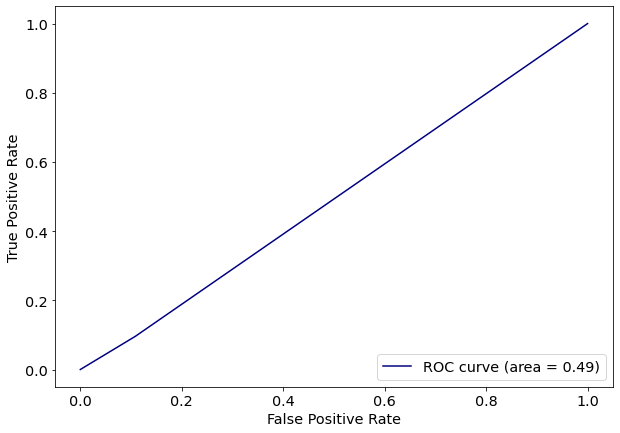

Accuracy: 0.8019


In [45]:
dummy_cl = DummyClassifier()
dummy_cl.fit(X_train, y_train)
y_pred_prob = dummy_cl.predict_proba(X_val)[:,1]
y_pred = dummy_cl.predict(X_val)

fp_tp_dummy = roc_curve(y_val, y_pred)
plt.plot(fp_tp_dummy[0], fp_tp_dummy[1], color='navy',
         label='ROC curve (area = %0.2f)' %(auc(fp_tp_dummy[0], fp_tp_dummy[1])))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()

print('Accuracy: %.4f' %(accuracy_score(y_val, y_pred)))

We can see that these metrics are very poor! With no machine learning, the AUC ROC is 0.50 which is as good (or bad!) as random guess. Although the accuracy metrics are high (0.8!) clearly implying it is not something we should be optimizing.

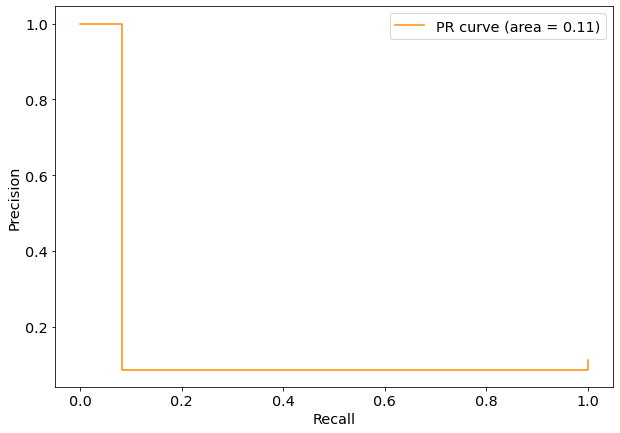

Precision: 0.1009
Recall: 0.0959


In [46]:
pr_dummy = precision_recall_curve(y_val, y_pred_prob)
plt.step(pr_dummy[1], pr_dummy[0], color='darkorange',
         label='PR curve (area = %0.2f)' %(average_precision_score(y_val, y_pred_prob)))
plt.xlabel('Recall', color='black')
plt.ylabel('Precision', color='black')
plt.legend(loc='upper right')
plt.show()

print('Precision: %.4f' %(precision_score(y_val, y_pred)))
print('Recall: %.4f' %(recall_score(y_val, y_pred)))

With no machine learning, we are only able to identify 9% of the individuals who would subscribe for term deposit and only 10% of those predicted are actually true. A naive approach clearly does not provide much value.

### Base Model Evaluation

We need to see if machine learning is up to the task of improving on these predictions. We'll start simple, using a classification models to assess without hyperparaneter tuning on both training and validation sets to understand their performance.

For an imbalanced classification problem, there are a number of metrics to consider:

- Precision Score: number of true positives divided by the total number of positives predicted
- Recall Score: number of true positives divided by the total number of actual positives in the data
- F1 Score: Harmonic mean of precision and recall
- Precision Recall Area Under the Curve (PR AUC): shows the tradeoff between precision and recall for different thresholds.
- Receiver Operating Characteristic Area Under the Curve (ROC AUC): a measure between 0 and 1 comparing the performance of the classifier when predicting probabilities across a range of thresholds.


The metric of choice in the present case was precision while ensuring all other metrics are also optimized.

In [47]:
def model_fit(alg, X_train, X_val, y_train, y_val, title, plot=True):
    
    #fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #predict training set:
    y_train_pred = alg.predict(X_train)
    y_train_predprob = alg.predict_proba(X_train)[:,1]
    
    y_val_pred = alg.predict(X_val)
    y_val_predprob = alg.predict_proba(X_val)[:,1]
    
    precision_train, recall_train, thr_train = precision_recall_curve(y_train, y_train_predprob, pos_label=1)
    precision_val, recall_val, thr_val = precision_recall_curve(y_val, y_val_predprob, pos_label=1)
    
    #get get positives and true positives on train and validation sets:
    fp_tp_train = roc_curve(y_train, y_train_pred)
    fp_tp_val = roc_curve(y_val, y_val_pred) 
    
    print ("Model report on training data:")
    print ("Train: Precision: %.4f" %(precision_score(y_train, y_train_pred)))
    print ("Train: Recall : %.4f" %(recall_score(y_train, y_train_pred)))
    print ("ROC AUC (Train): %.4f" %(roc_auc_score(y_train, y_train_pred)))
    print('Train Accuracy: %.4f' %(accuracy_score(alg.predict(X_train),y_train)))
    print ("\nModel report on validation data:")
    print ("Validation: Precision: %.4f" %(precision_score(y_val, y_val_pred)))
    print ("Validation: Recall : %.4f" %(recall_score(y_val, y_val_pred)))
    print ("ROC AUC (Validation): %.4f" %(roc_auc_score(y_val, y_val_pred)))
    print('Validation Accuracy: %0.4f' %(accuracy_score(alg.predict(X_val),y_val)))
    
    if plot:
        plt.figure(figsize=(10,6))
        plt.plot(recall_val, precision_val, color='navy',label=' Validation PR-Curve')
        plt.plot(recall_train, precision_train, color='orange',label=' Train PR-Curve')
        plt.xlabel('Recall', color='black', fontsize=14)
        plt.ylabel('Precision', color='black', fontsize=14)
        plt.title(title, fontsize=16)
        plt.legend(loc="lower left")
        plt.show()

#### Logistic Regression

Let's use logistic regression in order to see baseline performance on this problem.

Model report on training data:
Train: Precision: 0.6669
Train: Recall : 0.2298
ROC AUC (Train): 0.6076
Train Accuracy: 0.9003

Model report on validation data:
Validation: Precision: 0.6288
Validation: Recall : 0.2209
ROC AUC (Validation): 0.6022
Validation Accuracy: 0.8975


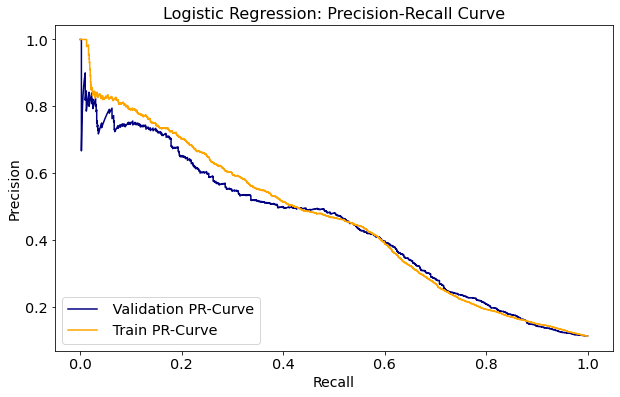

In [48]:
#fit logistic regression and predict y
lr = LogisticRegression(random_state=42, max_iter=500)
model_fit(lr, X_train, X_val, y_train, y_val, 'Logistic Regression: Precision-Recall Curve')

Recall on the training and validation is fairly low (about 22%), however, the precision  is  good (about 60%) for both the training and validation sets. The model seems to be good at correctly predicting positive class but is excessively likely to predict cases as negative.
One positive thing about this model is that the training dataset results closely match the validation set results, implying that model is neither underfitting nor overfitting.

### Random Forest Classifier

Model report on training data:
Train: Precision: 0.9886
Train: Recall : 0.9604
ROC AUC (Train): 0.9795
Train Accuracy: 0.9943

Model report on validation data:
Validation: Precision: 0.5203
Validation: Recall : 0.2759
ROC AUC (Validation): 0.6218
Validation Accuracy: 0.8898


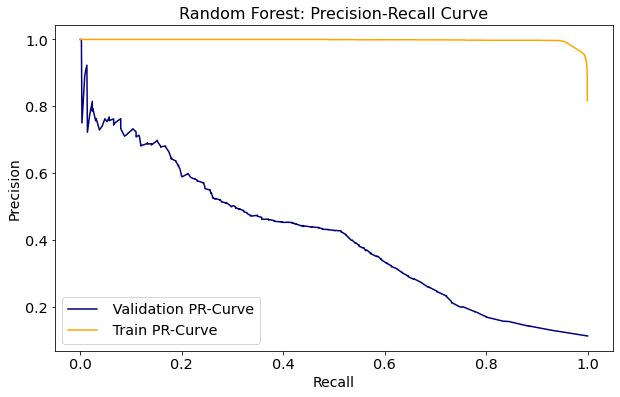

In [49]:
#fit random forest classifier and predict y
rf = RandomForestClassifier(random_state=42)
model_fit(rf, X_train, X_val, y_train, y_val, 'Random Forest: Precision-Recall Curve', True)

Random Forest is grossly overfitting the training dataset and is showing almost 100% recall and precision. The performance on the validation set is similar to that of Logistic Regression.

### kNeighbors Classifier

Model report on training data:
Train: Precision: 0.7139
Train: Recall : 0.3758
ROC AUC (Train): 0.6783
Train Accuracy: 0.9127

Model report on validation data:
Validation: Precision: 0.5010
Validation: Recall : 0.2662
ROC AUC (Validation): 0.6163
Validation Accuracy: 0.8875


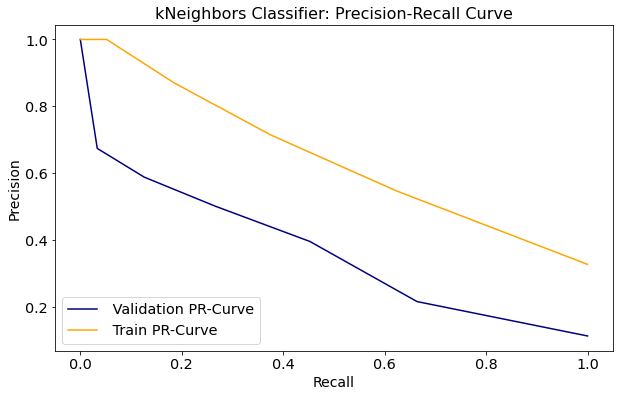

In [50]:
knn = KNeighborsClassifier()
model_fit(knn, X_train, X_val, y_train, y_val, 'kNeighbors Classifier: Precision-Recall Curve', True)

Again, the model seems to be overfitting the training dataset.

Next, we will compare the metrics (accuracy, precision, recall, f1, ROC AUC, PRC AUC) for all the models and plot their precision recall curves.

In [51]:
def show_metrics(X_train, y_train, title):
    MLA = [lr, rf, knn]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    plt.figure(figsize=(10,6))
    for alg in MLA:
        pred = alg.fit(X_train, y_train).predict(X_val)
        pred_prob = alg.predict_proba(X_val)
        fp, tp, th = roc_curve(y_val, pred)     
        y_score = pred_prob[:,1]
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy'] = accuracy_score(y_val, pred)
        MLA_compare.loc[row_index, 'Precision'] = precision_score(y_val, pred)
        MLA_compare.loc[row_index, 'Recall'] = recall_score(y_val, pred)
        MLA_compare.loc[row_index, 'F-1 score'] = f1_score(y_val, pred)
        MLA_compare.loc[row_index, 'ROC_AUC'] = auc(fp, tp)
        
        alg_precision, alg_recall, alg_thresholds = precision_recall_curve(y_val, y_score)
        MLA_compare.loc[row_index, 'PRC_AUC'] = auc(alg_recall, alg_precision)
        
        plt.step(alg_recall, alg_precision, marker='.', markersize=1, label=MLA_name)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(title)
        plt.legend()
        
        row_index+=1
        
    return(MLA_compare)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.897548,0.628834,0.220905,0.326954,0.602176,0.441963
1,RandomForestClassifier,0.889779,0.520325,0.275862,0.360563,0.621789,0.406677
2,KNeighborsClassifier,0.887473,0.501014,0.266164,0.347643,0.616256,0.365980


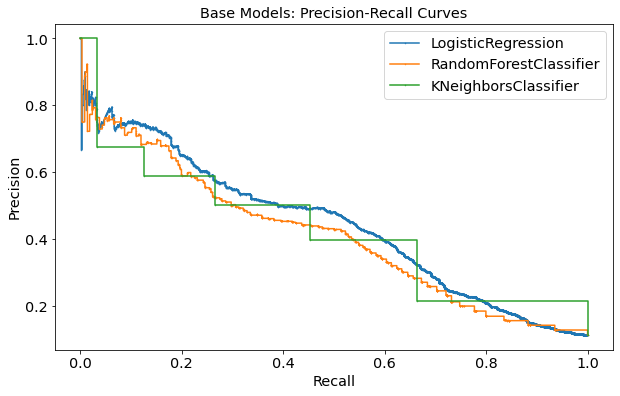

In [52]:
show_metrics(X_train, y_train, 'Base Models: Precision-Recall Curves')

## Resampling Strategies

Since our positive class comprise 11% of the total cases,we will use some techniques to handle this highly unbalanced dataset, with a focus on following resampling methods:
- Random oversampling: randomly duplicate examples in the majority class
- Random undersampling: randomly delete examples in the minority class
- Synthetic Minority Oversampling Technique (SMOTE): selects examples that are close in the feature space, draws a line between the examples and draws a new sample at a point along that line
- SMOTEENN: combines over- and under-sampling using SMOTE and Edited Nearest Neighbours

In [53]:
ros = RandomOverSampler()
rus = RandomUnderSampler()
smote = SMOTE()
smoteenn = SMOTEENN()
columns = X_train.columns

In [54]:
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=42, max_iter=500)))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('RandomForest Classifier', RandomForestClassifier(random_state=42)))

In [55]:
def resamp_eval(X_resamp, y_resamp):
    names = []
    for name, model in models:
        names.append(name)
        print(name)
        model_fit(model, X_resamp, X_val, y_resamp, y_val, 'Resampled Precision Recall curves', True)

Now we will perform the comparison of models using various sampling techniques.

### Oversampling

In [56]:
#use oversampling to fit the models and predict y
os_X, os_y = ros.fit_sample(X_train, y_train.ravel())

Logistic Regression
Model report on training data:
Train: Precision: 0.8129
Train: Recall : 0.6255
ROC AUC (Train): 0.7407
Train Accuracy: 0.7407

Model report on validation data:
Validation: Precision: 0.3541
Validation: Recall : 0.6315
ROC AUC (Validation): 0.7426
Validation Accuracy: 0.8287


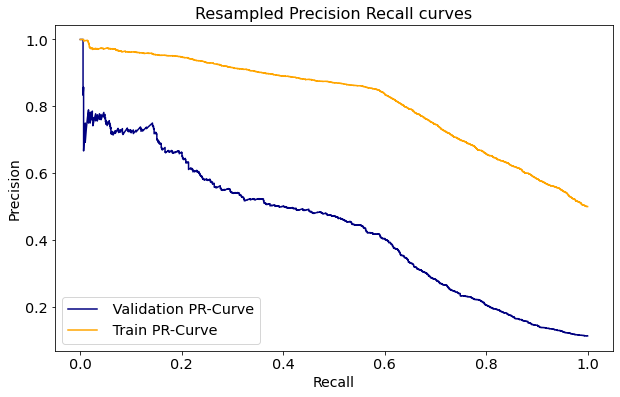

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.8683
Train: Recall : 0.9985
ROC AUC (Train): 0.9235
Train Accuracy: 0.9235

Model report on validation data:
Validation: Precision: 0.2592
Validation: Recall : 0.5765
ROC AUC (Validation): 0.6837
Validation Accuracy: 0.7667


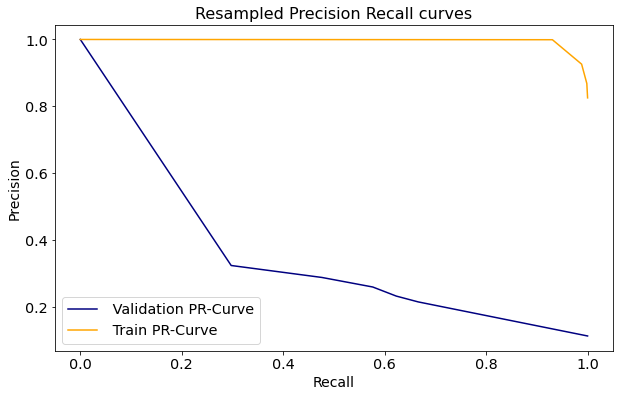

RandomForest Classifier
Model report on training data:
Train: Precision: 0.9927
Train: Recall : 1.0000
ROC AUC (Train): 0.9963
Train Accuracy: 0.9963

Model report on validation data:
Validation: Precision: 0.4495
Validation: Recall : 0.3642
ROC AUC (Validation): 0.6538
Validation Accuracy: 0.8781


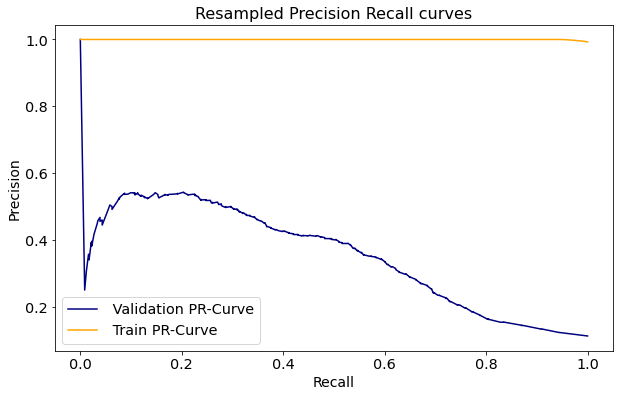

In [57]:
resamp_eval(os_X, os_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.828721,0.354079,0.631466,0.453736,0.742614,0.436901
1,RandomForestClassifier,0.878126,0.449468,0.364224,0.402381,0.653795,0.353768
2,KNeighborsClassifier,0.766691,0.259205,0.576509,0.357620,0.683672,0.354584


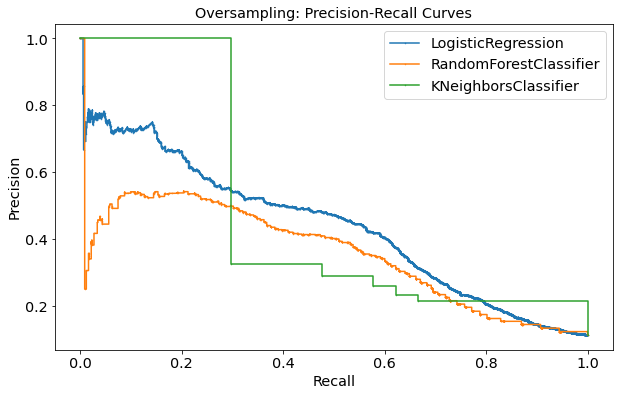

In [58]:
show_metrics(os_X, os_y, 'Oversampling: Precision-Recall Curves')

Oversampling resulted in an overfitted model.

### Undersampling

In [59]:
#use undersampling to fit the models and predict y
us_X, us_y = rus.fit_sample(X_train, y_train.ravel())

Logistic Regression
Model report on training data:
Train: Precision: 0.7964
Train: Recall : 0.6312
ROC AUC (Train): 0.7349
Train Accuracy: 0.7349

Model report on validation data:
Validation: Precision: 0.3439
Validation: Recall : 0.6412
ROC AUC (Validation): 0.7429
Validation Accuracy: 0.8218


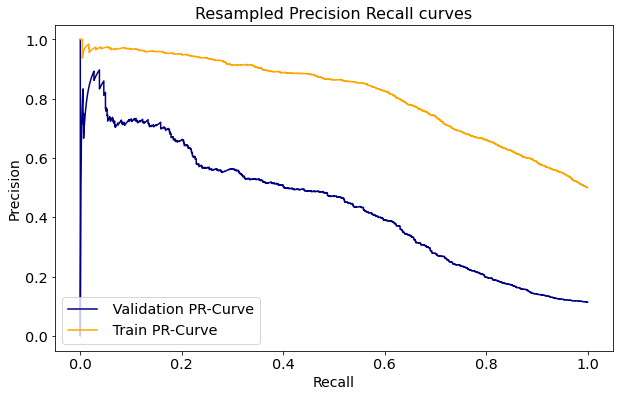

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.8097
Train: Recall : 0.7575
ROC AUC (Train): 0.7897
Train Accuracy: 0.7897

Model report on validation data:
Validation: Precision: 0.2414
Validation: Recall : 0.6681
ROC AUC (Validation): 0.7008
Validation Accuracy: 0.7261


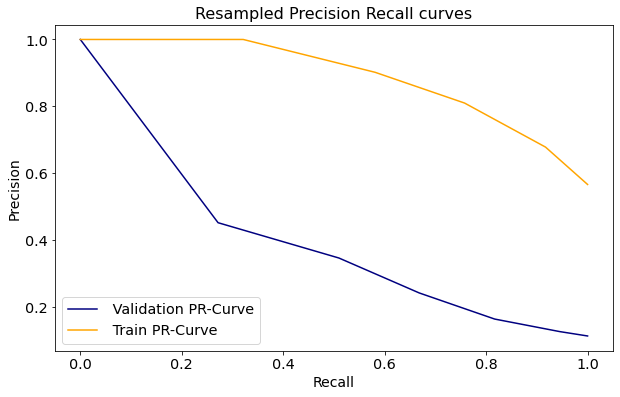

RandomForest Classifier
Model report on training data:
Train: Precision: 0.9960
Train: Recall : 0.9970
ROC AUC (Train): 0.9965
Train Accuracy: 0.9965

Model report on validation data:
Validation: Precision: 0.2899
Validation: Recall : 0.6595
ROC AUC (Validation): 0.7272
Validation Accuracy: 0.7797


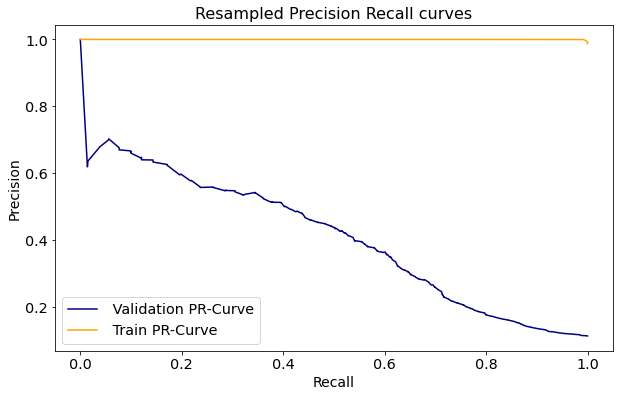

In [60]:
resamp_eval(us_X, us_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.821801,0.343931,0.641164,0.447705,0.742949,0.437722
1,RandomForestClassifier,0.779680,0.289910,0.659483,0.402764,0.727211,0.407221
2,KNeighborsClassifier,0.726147,0.241433,0.668103,0.354691,0.700810,0.393775


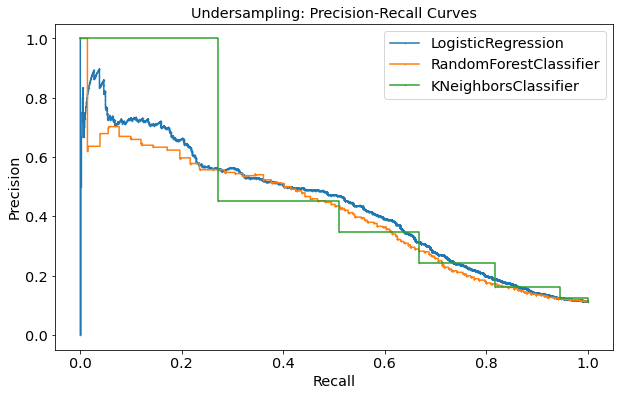

In [61]:
show_metrics(us_X, us_y, 'Undersampling: Precision-Recall Curves')

Undersampling did not improve the precision.

### SMOTE

In [62]:
smote_X, smote_y = smote.fit_sample(X_train, y_train.ravel())

Logistic Regression
Model report on training data:
Train: Precision: 0.8236
Train: Recall : 0.7773
ROC AUC (Train): 0.8054
Train Accuracy: 0.8054

Model report on validation data:
Validation: Precision: 0.2692
Validation: Recall : 0.5129
ROC AUC (Validation): 0.6681
Validation Accuracy: 0.7883


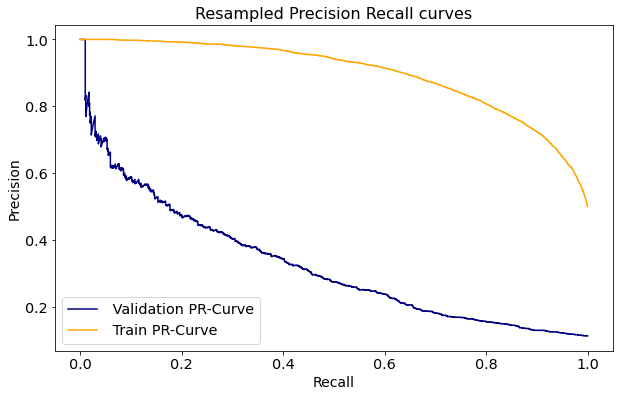

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.8421
Train: Recall : 0.9687
ROC AUC (Train): 0.8936
Train Accuracy: 0.8936

Model report on validation data:
Validation: Precision: 0.2368
Validation: Recall : 0.6228
ROC AUC (Validation): 0.6840
Validation Accuracy: 0.7314


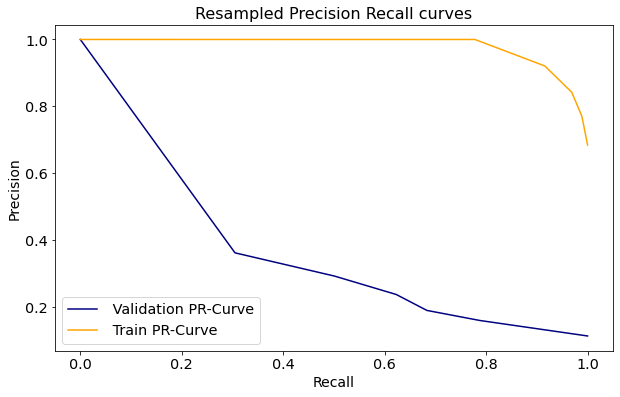

RandomForest Classifier
Model report on training data:
Train: Precision: 0.9966
Train: Recall : 0.9967
ROC AUC (Train): 0.9966
Train Accuracy: 0.9966

Model report on validation data:
Validation: Precision: 0.4314
Validation: Recall : 0.3998
ROC AUC (Validation): 0.6664
Validation Accuracy: 0.8730


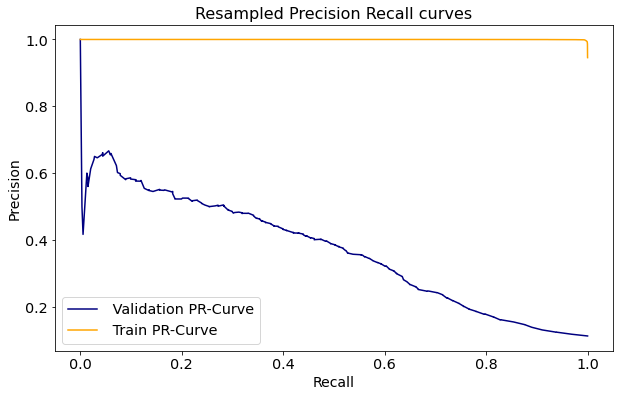

In [63]:
resamp_eval(smote_X, smote_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.788298,0.269231,0.512931,0.353116,0.668093,0.324541
1,RandomForestClassifier,0.873027,0.431395,0.399784,0.414989,0.666445,0.366039
2,KNeighborsClassifier,0.731367,0.236788,0.622845,0.343129,0.683994,0.363720


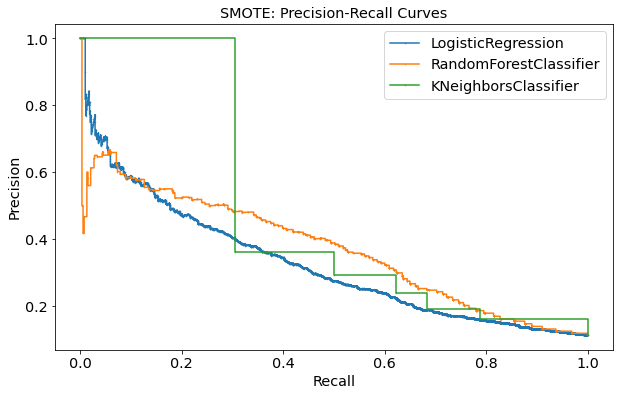

In [64]:
show_metrics(smote_X, smote_y, 'SMOTE: Precision-Recall Curves')

SMOTE did not improve the precision.

### SMOTEENN

In [65]:
#use SMOTEENN to fit the models and predict y
smoteenn_X, smoteenn_y = smoteenn.fit_sample(X_train, y_train.ravel())

Logistic Regression
Model report on training data:
Train: Precision: 0.8864
Train: Recall : 0.8433
ROC AUC (Train): 0.8516
Train Accuracy: 0.8505

Model report on validation data:
Validation: Precision: 0.2726
Validation: Recall : 0.6498
ROC AUC (Validation): 0.7148
Validation Accuracy: 0.7652


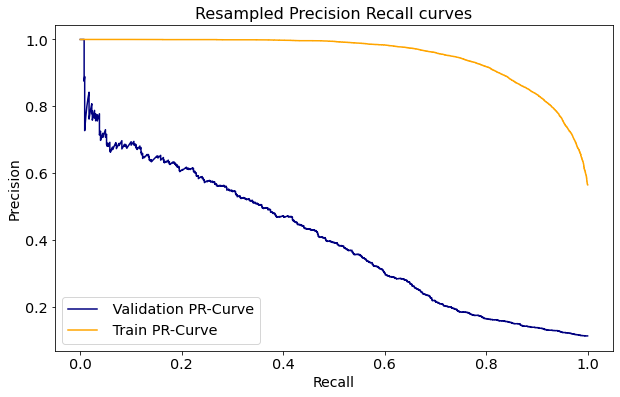

KNeighbors Classifier
Model report on training data:
Train: Precision: 0.9507
Train: Recall : 0.9833
ROC AUC (Train): 0.9586
Train Accuracy: 0.9618

Model report on validation data:
Validation: Precision: 0.2170
Validation: Recall : 0.6918
ROC AUC (Validation): 0.6874
Validation Accuracy: 0.6840


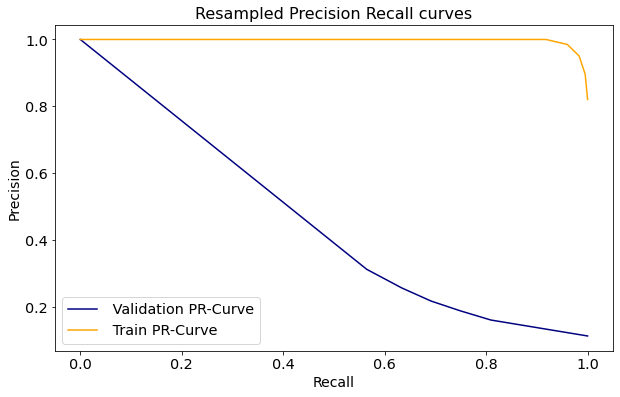

RandomForest Classifier
Model report on training data:
Train: Precision: 1.0000
Train: Recall : 1.0000
ROC AUC (Train): 1.0000
Train Accuracy: 1.0000

Model report on validation data:
Validation: Precision: 0.3650
Validation: Recall : 0.5959
ROC AUC (Validation): 0.7322
Validation Accuracy: 0.8377


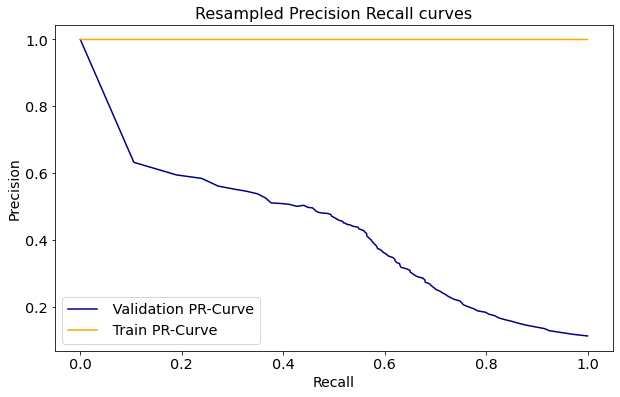

In [66]:
resamp_eval(smoteenn_X, smoteenn_y)

,MLA Name,Accuracy,Precision,Recall,F-1 score,ROC_AUC,PRC_AUC
0,LogisticRegression,0.765234,0.272604,0.649784,0.384076,0.714838,0.398880
1,RandomForestClassifier,0.837703,0.365017,0.595905,0.452722,0.732152,0.426422
2,KNeighborsClassifier,0.684025,0.216965,0.691810,0.330332,0.687424,0.451933


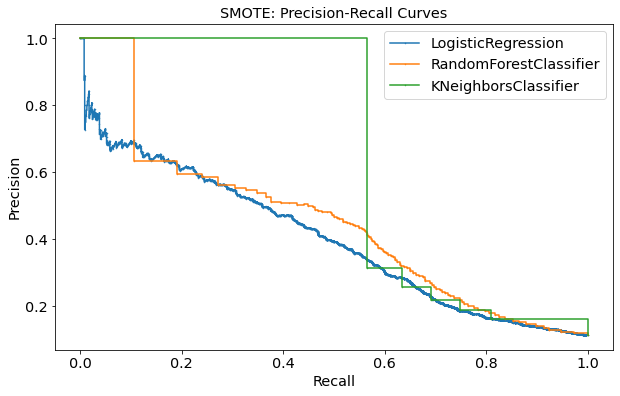

In [67]:
show_metrics(smoteenn_X, smoteenn_y, 'SMOTE: Precision-Recall Curves')

SMOTEENN Undersampling did not improve the precision.

### Changing the class weights for Logistic Regression

In [68]:
#using class weight as balanced
lr_b = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')
lr_b.fit(X_train, y_train)
y_pred = lr_b.predict(X_val)

print('Classification Report:\n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('Accuracy: \n', accuracy_score(y_val, y_pred))
print('ROC AUC: \n', roc_auc_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      7310
           1       0.35      0.64      0.45       928

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.83      0.85      8238

Confusion Matrix: 
 [[6216 1094]
 [ 337  591]]
Accuracy: 
 0.8262927895120175
ROC AUC: 
 0.743597722769942


In [69]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0},
     {0:200,1:1.0}, {0:150,1:1.0}, {0:100,1:1.0},
     {0:99,1:1.0}, {0:10,1:1.0}, {0:0.01,1:1.0},
     {0:0.01,1:10}, {0:0.01,1:100}, {0:0.001,1:1.0},
     {0:0.005,1:1.0}, {0:1.0,1:1.0}, {0:1.0,1:0.1},
     {0:10,1:0.1}, {0:100,1:0.1}, {0:10,1:0.01},
     {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100},
     {0:1.0,1:150}, {0:1.0,1:200}, {0:1.0,1:300},
     {0:1.0,1:400},{0:1.0,1:500}, {0:1.0,1:1000},
     {0:10,1:1000},{0:100,1:1000}]

hyperparam_grid = {"class_weight": w }

In [70]:
# gridsearch for class weights
lr_w = LogisticRegression(max_iter=500, random_state=42)
grid = GridSearchCV(lr_w, hyperparam_grid, scoring='roc_auc', cv=5, n_jobs=-1, refit=True)
grid.fit(X_train, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7918458225503971 with param: {'class_weight': {0: 1.0, 1: 10}}


In [71]:
#fit using most optimum class weights
lr_w = LogisticRegression(max_iter=500, random_state=42, class_weight={0: 1, 1: 10})
lr_w.fit(X_train,y_train)
y_pred = lr_w.predict(X_val)

print('Classification Report:\n', classification_report(y_val, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_val, y_pred))
print('Accuracy: \n', accuracy_score(y_val, y_pred))
print('ROC AUC: \n', roc_auc_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      7310
           1       0.30      0.68      0.42       928

    accuracy                           0.79      8238
   macro avg       0.63      0.74      0.64      8238
weighted avg       0.88      0.79      0.82      8238

Confusion Matrix: 
 [[5838 1472]
 [ 298  630]]
Accuracy: 
 0.7851420247632921
ROC AUC: 
 0.73875566064437


Unfortunately, these techniques did not result in a better model either.

## Hyperparameter Tuning

Hyperparameter tuning was performed on the Logistic Regression model.

In [72]:
#use hyperparamater tuning on Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [0.01, 0.1, 1, 10, 100, 1000]

grid = dict(solver=solvers, penalty=penalty, C=c_values)

lr_cv = GridSearchCV(lr, cv=5, param_grid=grid, scoring='precision', n_jobs=-1, refit=True)

lr_cv.fit(X_train, y_train)

y_pred_lr = lr_cv.predict(X_val)

y_predprob_lr = lr_cv.predict_proba(X_val)[:,1]

print(classification_report(y_val, y_pred_lr))
print("Tuned Model Parameters: {}".format(lr_cv.best_params_))
print("\nConfusion Matrix: \n", confusion_matrix(y_val, y_pred_lr))
print('')
print('Precision: %.4f' %(precision_score(y_val, y_pred_lr)))
print('Recall: %.4f' %(recall_score(y_val, y_pred_lr)))
print('')
precision, recall, thresholds = precision_recall_curve(y_val, y_predprob_lr)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_val, y_predprob_lr)
print('Area under ROC: %.4f'%(auc(fp, tp)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.66      0.22      0.32       928

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238

Tuned Model Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix: 
 [[7205  105]
 [ 728  200]]

Precision: 0.6557
Recall: 0.2155

Area under PRC: 0.4466
Area under ROC: 0.7953


## PR and ROC curves for validation set

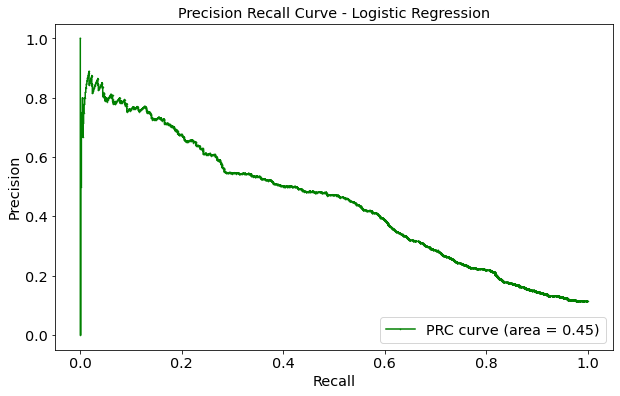

In [73]:
lrsmtn_precision, lrsmtn_recall, lrsmtn_thresholds = precision_recall_curve(y_val, y_predprob_lr)

plt.figure(figsize=(10, 6))
plt.step(lrsmtn_recall, lrsmtn_precision, color= 'green', marker='.', markersize=1,
         label='PRC curve (area = %0.2f)' %(auc(lrsmtn_recall, lrsmtn_precision)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Logistic Regression')
plt.legend(loc="lower right")

plt.show()

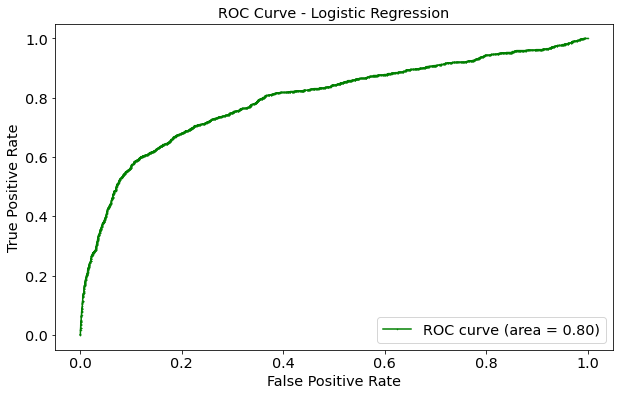

In [74]:
fp, tp, th = roc_curve(y_val, y_predprob_lr)
plt.figure(figsize=(10, 6))
plt.plot(fp, tp, marker='.', color = 'green', markersize=1, label='ROC curve (area = %0.2f)' %(auc(fp, tp)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

plt.show()

## Feature Importance

In [75]:
lr_cv.best_estimator_.coef_

array([[ 0.        , -1.19360701,  0.67593059,  0.13002082,  0.        ,
         0.        , -0.09590067,  0.01287299, -0.18735728,  0.        ,
        -0.05341766,  0.        ,  0.17005455,  0.        , -0.11715323,
         0.2445845 ,  0.        ,  0.        ,  0.        , -0.00940506,
         0.00363592,  0.        ,  0.        , -0.05310519, -0.02652568,
         0.        ,  0.        ,  0.04780607,  0.03152244, -0.62871441,
         0.38531396,  1.63512167,  0.18874672,  0.0777976 ,  0.07844458,
        -0.24647532,  1.09917905, -0.56040252, -0.37245859,  0.        ,
        -0.02277707, -0.22218994,  0.03057162,  0.        ,  0.09658058,
         0.        , -0.02749879,  0.        , -0.00636844]])

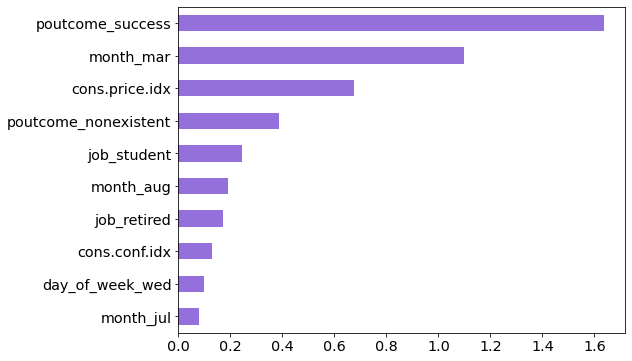

In [76]:
#get feature importance
plt.figure(figsize=(8, 6))
coef = pd.Series(lr_cv.best_estimator_.coef_[0], index=X_train.columns).sort_values(ascending=False)[:10]
coef.sort_values().plot(kind="barh", color='mediumpurple')

plt.show()

In [77]:
#saving the most optimum model as best_model
best_model = lr_cv.best_estimator_

## Partial Dependence Plots

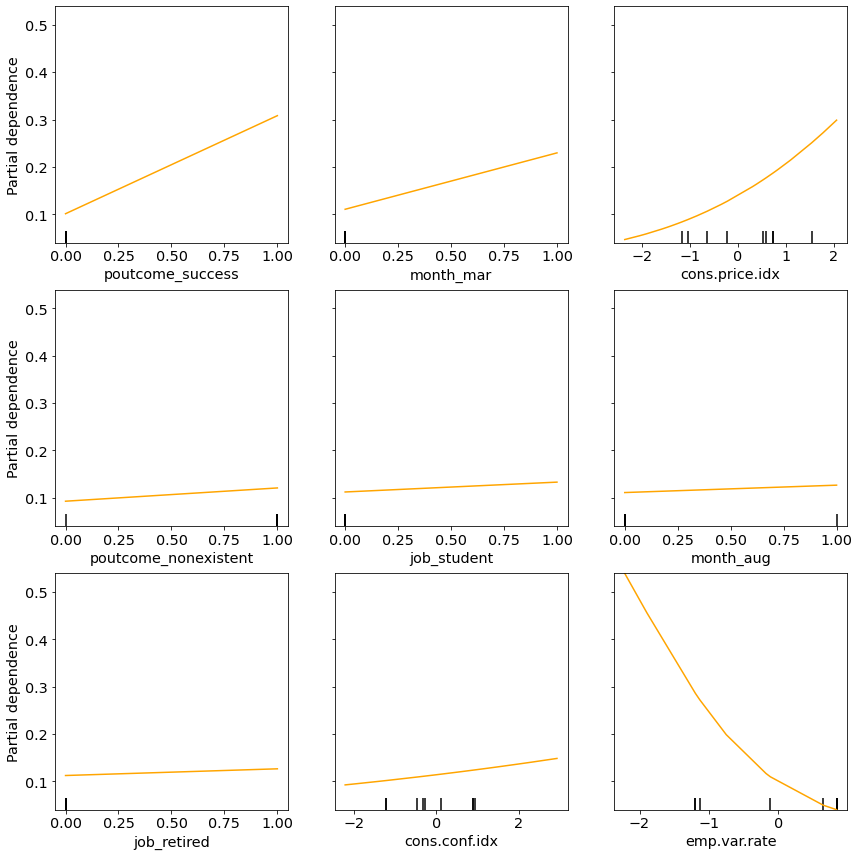

In [78]:
fig = plt.figure(figsize=(12, 12))
plot_partial_dependence(best_model, X_val, ['poutcome_success', 'month_mar', 'cons.price.idx',
                                            'poutcome_nonexistent', 'job_student', 'month_aug',
                                            'job_retired', 'cons.conf.idx', 'emp.var.rate'], fig=fig, line_kw={"color": "orange"})
plt.tight_layout()
plt.show()

Partial dependence plots show the dependence between the target response and a set of target features, marginalizing over the values of all other features.

# Test set

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [80]:
df_test['y'] = df_test['y'].map({'no':0, 'yes':1})

In [81]:
df_test.drop(['duration', 'default', 'pdays'], axis=1, inplace=True)

In [82]:
X_test = df_test.drop(['y'], axis=1)
y_test = df_test['y']

In [83]:
num_features = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                'euribor3m', 'nr.employed', 'campaign', 'previous']
cat_features = ['job', 'marital', 'education', 'contact', 'poutcome',
                'month', 'day_of_week', 'housing', 'loan']

In [84]:
scaled_test = pd.DataFrame(scaler.transform(X_test[num_features]),columns=X_test[num_features].columns).reset_index(drop=True)
X_test = pd.concat([scaled_test, X_test[cat_features].reset_index(drop=True)], axis=1)

In [85]:
X_test = pd.get_dummies(X_test, columns=cat_features, drop_first=True)

In [86]:
X_test.shape

(4119, 49)

In [87]:
best_model.fit(X_train, y_train)

y_pred_final = best_model.predict(X_test)

y_predprob_final = best_model.predict_proba(X_test)[:,1]

print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_final))
print('')
print('Precision: %.4f' %(precision_score(y_test, y_pred_final)))
print('Recall: %.4f' %(recall_score(y_test, y_pred_final)))
print('')
precision, recall, thresholds = precision_recall_curve(y_test, y_predprob_final)

print('Area under PRC: %.4f'%(auc(recall, precision)))

fp, tp, th = roc_curve(y_test, y_predprob_final)
print('Area under ROC: %.4f'%(auc(fp, tp)))


Confusion Matrix: 
 [[3611   57]
 [ 348  103]]

Precision: 0.6438
Recall: 0.2284

Area under PRC: 0.4489
Area under ROC: 0.7865


## PR and ROC curves for test set

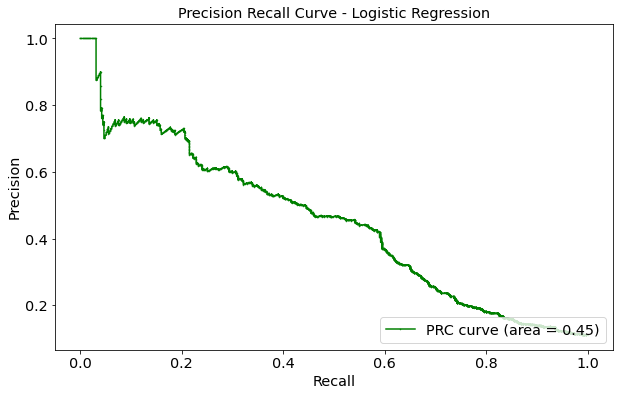

In [88]:
lrsmtn_precision, lrsmtn_recall, lrsmtn_thresholds = precision_recall_curve(y_test, y_predprob_final)

plt.figure(figsize=(10, 6))
plt.step(lrsmtn_recall, lrsmtn_precision, color= 'green', marker='.', markersize=1,
         label='PRC curve (area = %0.2f)' %(auc(lrsmtn_recall, lrsmtn_precision)))
plt.xlabel('Recall', color='black')
plt.ylabel('Precision', color='black')
plt.title('Precision Recall Curve - Logistic Regression')
plt.legend(loc="lower right")

plt.show()

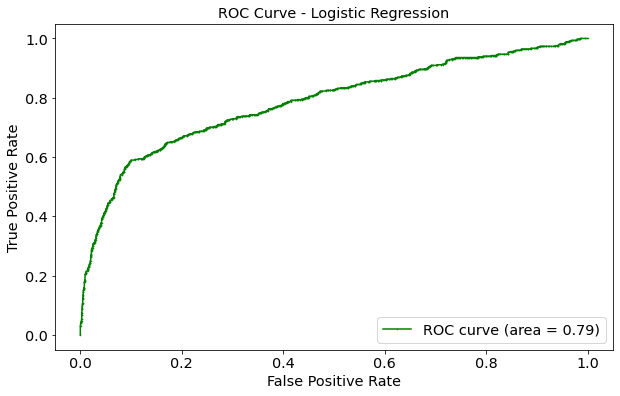

In [89]:
fp, tp, th = roc_curve(y_test, y_predprob_final)
plt.figure(figsize=(10, 6))
plt.plot(fp, tp, marker='.', color = 'green', markersize=1, label='ROC curve (area = %0.2f)' %(auc(fp, tp)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

plt.show()

## Calibration Plots

Text(0.5, 1.0, 'Logistic Regression Calibration Curve')

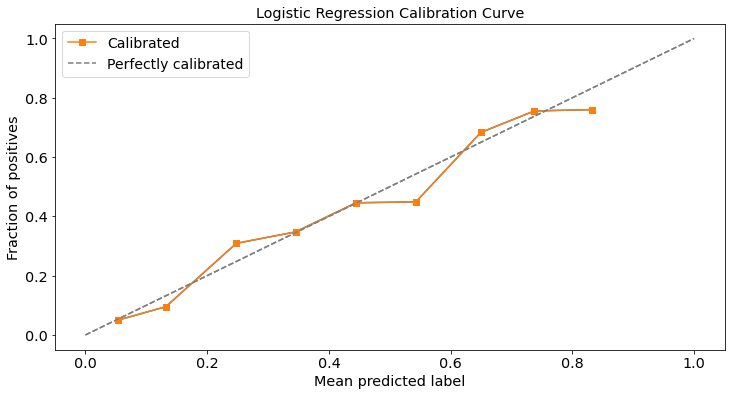

In [90]:
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_predprob_final, n_bins=10)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Calibrated')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')

plt.xlabel('Mean predicted label')
plt.ylabel('Fraction of positives')
plt.legend(fontsize=14)
plt.title("Logistic Regression Calibration Curve")

To get confidence on our predictions, calibration plot was also obtained that overlaid well with the calibrated model. Our model is capable of giving excellent estimates of the class probabilities. The calibration module allows to better calibrate the probabilities of a given model. Calibration adds the support for probability prediction.